# Breast Cancer Detection using Machine Learning

## 1. data anaylysis

In [86]:
import os
import glob
import numpy as np
import pandas as pd

from sklearn.preprocessing import OneHotEncoder

from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt


import tensorflow as tf




In [22]:
TRAIN_CSV = "./data/train/feats.csv"
TRAIN_IMG_DIR = "./data/train/images"

TEST_CSV = "./data/test/feats.csv"
TEST_IMG_DIR = "./data/test/images"

In [68]:
train_df = pd.read_csv(TRAIN_CSV)
print("train record:\n", train_df.head())
print("train record shape: ", train_df.shape)




train record:
                                                   id  age  HER2    P53  \
0  8a1af6f74cafc720511888998f2f361767c77965a07464...   48     3   True   
1  b18adad8c39bb458f208581fe40e9be7b04f2b49be04b0...   54     3  False   
2  8b9af020d0e621168fd0f3913f2cd74e8bb5ea85f61ee0...   55     2   True   
3  1a0e54f07794fbb95a0fd7f0b4ef6f79ef1a9c83dbaa05...   66     0  False   
4  2805706a656b013743d84357d5ffa44536e19d18f0509f...   31     0  False   

   molecular_subtype  
0                  3  
1                  2  
2                  3  
3                  4  
4                  1  
train record shape:  (200, 5)


In [69]:
test_df = pd.read_csv(TEST_CSV)
print("test record:\n", test_df.tail())
test_df.shape

test record:
                                                    id  age  HER2    P53
82  0de3f1bf4ccc440271f091d79e9d3be7348dd5a39d7657...   66     3  False
83  46aaa33f2f3c07741ca4aeea4c9f3e54e23d86ee8e4fd6...   50     0  False
84  2eaae4e8b29e28877112cfdc0257b93218d97cdbfb6670...   53     3  False
85  7a1725339e56e7a9cff48bb5af4ea84f731996a88a4422...   46     0  False
86  d59d78555b3a4f3175c5f2183ffc214eb06a4573289cb2...   48     1  False


(87, 4)

(514, 760)


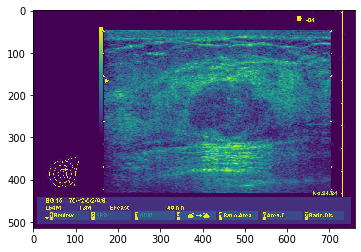

In [52]:
img = Image.open(os.path.join(TRAIN_IMG_DIR, train_df.iloc[100, 0], "1.jpg"))
plt.imshow(img)

print(np.asarray(img).shape)

## 2. data preprocessing

In [95]:
## covert label to onehot encoding
raw_train_label = list(train_df["molecular_subtype"])
raw_train_label = np.asarray(raw_train_label).reshape(-1, 1)
#print(raw_train_label)
enc = OneHotEncoder(sparse=False)
enc.fit(raw_train_label)
train_label = enc.transform(raw_train_label)

for raw, transformed in zip(raw_train_label, train_label):
    print(raw, transformed)
    

[3] [0. 0. 1. 0.]
[2] [0. 1. 0. 0.]
[3] [0. 0. 1. 0.]
[4] [0. 0. 0. 1.]
[1] [1. 0. 0. 0.]
[2] [0. 1. 0. 0.]
[1] [1. 0. 0. 0.]
[2] [0. 1. 0. 0.]
[2] [0. 1. 0. 0.]
[3] [0. 0. 1. 0.]
[1] [1. 0. 0. 0.]
[1] [1. 0. 0. 0.]
[2] [0. 1. 0. 0.]
[3] [0. 0. 1. 0.]
[3] [0. 0. 1. 0.]
[1] [1. 0. 0. 0.]
[1] [1. 0. 0. 0.]
[2] [0. 1. 0. 0.]
[3] [0. 0. 1. 0.]
[1] [1. 0. 0. 0.]
[4] [0. 0. 0. 1.]
[3] [0. 0. 1. 0.]
[2] [0. 1. 0. 0.]
[3] [0. 0. 1. 0.]
[2] [0. 1. 0. 0.]
[2] [0. 1. 0. 0.]
[2] [0. 1. 0. 0.]
[2] [0. 1. 0. 0.]
[1] [1. 0. 0. 0.]
[2] [0. 1. 0. 0.]
[1] [1. 0. 0. 0.]
[2] [0. 1. 0. 0.]
[1] [1. 0. 0. 0.]
[2] [0. 1. 0. 0.]
[1] [1. 0. 0. 0.]
[2] [0. 1. 0. 0.]
[1] [1. 0. 0. 0.]
[2] [0. 1. 0. 0.]
[2] [0. 1. 0. 0.]
[2] [0. 1. 0. 0.]
[1] [1. 0. 0. 0.]
[2] [0. 1. 0. 0.]
[2] [0. 1. 0. 0.]
[1] [1. 0. 0. 0.]
[4] [0. 0. 0. 1.]
[2] [0. 1. 0. 0.]
[2] [0. 1. 0. 0.]
[2] [0. 1. 0. 0.]
[4] [0. 0. 0. 1.]
[3] [0. 0. 1. 0.]
[2] [0. 1. 0. 0.]
[1] [1. 0. 0. 0.]
[3] [0. 0. 1. 0.]
[1] [1. 0. 0. 0.]
[2] [0. 1. 0. 0.]
[3] [0. 0.

In [106]:
f = open("./data/train/cleaned_data.csv", "w")
for idx, row in train_df.iterrows():
    #print(idx, row["id"], row["molecular_subtype"], enc.transform(np.asarray(row["molecular_subtype"]).reshape(-1, 1)))
    images = glob.glob(os.path.join(TRAIN_IMG_DIR, row["id"], "*.*"))
    label = np.squeeze(enc.transform(np.asarray(row["molecular_subtype"]).reshape(-1, 1)))
    for image in images:
        #print(idx, image, label)
        f.write(f"{image}, {label}\n")

f.close()

## 2. build machine learning model 

In [72]:
def build_model():
    model = tf.keras.models.Sequential()
    return model

build_model()